# Data preparation (Text Mining)

## Library dependencies

In [2]:
import sqlite3
import nltk
import matplotlib.pyplot as plt
from collections import OrderedDict
import random

In [3]:
from nltk.corpus import stopwords
from string import punctuation

## Sqlite storage

In [4]:
conn = sqlite3.connect('reddit.db')
c = conn.cursor()

## Stopwords

In [5]:
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Filtering Function

In [6]:
manual_stopwords = [',','.',')',',','(','m',"'m","n't",'e.g',"'ve",'s','#','/','``',"'s","''",'!','r',']','=','[','s','&','%','*','...','1','2','3','4','5','6','7','8','9','10','--',"''",'’',';','-',':']

def wordFilter(excluded,wordrow): 
    filtered = [word for word in wordrow if word not in excluded and word not in punctuation and word not in manual_stopwords]
    return filtered  

## LowerCasing

In [7]:
def lowerCaseArray(wordrow): 
    lowercased = [word.lower() for word in wordrow]
    return lowercased  

## Process data 1

In [8]:
def data_processing(sql):
    c.execute(sql) #1
    data = {'wordMatrix':[],'all_words':[]}
    row = c.fetchone() #2
    while row is not None:
        wordrow = nltk.tokenize.word_tokenize(row[0]+" "+row[1]) #3
        wordrow_lowercased = lowerCaseArray(wordrow)
        wordrow_nostopwords = wordFilter(stopwords,wordrow_lowercased)
        data['all_words'].extend(wordrow_nostopwords) #4
        data['wordMatrix'].append(wordrow_nostopwords) #5
        row = c.fetchone()#6 
    return data
#1 create pointer to the sqlite data
#2 fetch the data row by row
#3 row[0] is the title, row[1] is the topic text, we turn them into a single text blob
#4 we will use  data['all_words'] for some data exploration
#5 data['wordMatrix'] is a matrix comprised of wordvectors, 1 vector per document.
#6 get a new document from the SQLite database

In [9]:
subreddits = ['datascience','gameofthrones']
data = {}
for subject in subreddits:
    data[subject] = data_processing(sql='''SELECT topicTitle,topicText,topicCategory FROM topics WHERE topicCategory = '''+"'"+subject+"'")

In [10]:
print (data['datascience']['wordMatrix'][0])

['weekly', 'entering', 'transitioning', 'thread', '09', 'aug', '2020', '16', 'aug', '2020', 'welcome', 'week', 'entering', 'transitioning', 'thread', 'thread', 'questions', 'getting', 'started', 'studying', 'transitioning', 'data', 'science', 'field', 'topics', 'include', 'learning', 'resources', 'books', 'tutorials', 'videos', 'traditional', 'education', 'schools', 'degrees', 'electives', 'alternative', 'education', 'online', 'courses', 'bootcamps', 'job', 'search', 'questions', 'resumes', 'applying', 'career', 'prospects', 'elementary', 'questions', 'start', 'next', 'wait', 'answers', 'community', 'check', 'faq', 'https', '//www.reddit.com/r/datascience/wiki/frequently-asked-questions', 'resources', 'resources', 'pages', 'wiki', 'also', 'search', 'answers', 'past', 'weekly', 'threads', 'https', '//www.reddit.com/r/datascience/search', 'q=weekly', '20thread', 'restrict_sr=1', 'sort=new']


## Explore data: word frequencies

### Category 1: Data Science

#### Word Frequencies

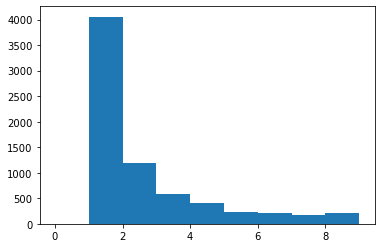

In [11]:
wordfreqs_cat1 = nltk.FreqDist(data['datascience']['all_words'])
plt.hist(wordfreqs_cat1.values(), bins = range(10))
plt.show()

#### Most frequent words within data science posts

In [12]:
print( wordfreqs_cat1.most_common(20))

[('data', 1388), ('science', 450), ('would', 373), ('like', 363), ('work', 322), ('job', 234), ('get', 229), ('use', 228), ('one', 208), ('know', 206), ('learning', 201), ('time', 201), ('company', 185), ('also', 181), ('want', 170), ('using', 168), ('https', 166), ('scientist', 160), ('model', 155), ('working', 152)]


#### Least Frequent terms within data science posts

In [13]:
print (wordfreqs_cat1.hapaxes())

['doc', '23', 'anova', 'rounded', 'poster', 'critiques', 'non-resume', 'early-to-mid', 'combining', 'sharpened', 'eyeing', 'space-industry', 'planet', 'descartes', 'orbital', 'bucks', 'hopes', "'freedom", 'conversely', 'reckon', 'workshop', 'scientists/analysts', 'foreign', 'awkward', 'interrupted', 'curiosity', 'prestigious', 'household', 'temporary', 'standardised', 'understand/standardise', 'tia', 'anyones', 'internee', 'hurdles', 'tecacher', 'hopeless', 'joining', 'frontier', '//www.esri.com/training/catalog/5d76dcf7e9ccda09bef61294/spatial-data-science', '3a-the-new-frontier-in-analytics/', 'mnc', 'entry/grad', 'science/machine', '20s', 'f100', 'nestle', 'unilever', 'downside', 'telecom', 'coaching/mentorship', 'progresses', 'cornering', 'non-independent', 'pre-2018', 'post-2018', 'reticulate', 'centos', 'installed', 'usable', 'janky', 'bash', 'no-go', 'commented', 'optimistically', 'named', 'use\\_conda\\_env', '276', 'interchangeably', 'dockerhub', 'self-sufficient', 'bright', '

### Category 2: Game of Thrones

#### Word Frequencies

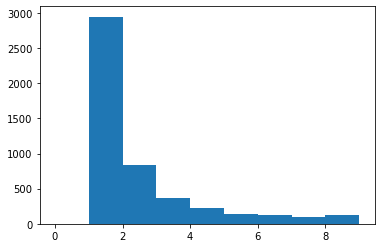

In [14]:
wordfreqs_cat2 = nltk.FreqDist(data['gameofthrones']['all_words'])
plt.hist(wordfreqs_cat2.values(), bins = range(10))
plt.show()

#### Most Frequent words within Game of Thrones posts

In [15]:
print (wordfreqs_cat2.most_common(20))

[('spoilers', 570), ('would', 215), ('season', 173), ('king', 171), ('like', 161), ('jon', 156), ('show', 154), ('got', 149), ('one', 121), ('time', 119), ('game', 113), ('think', 107), ('could', 95), ('thrones', 95), ('know', 91), ('people', 89), ('arya', 87), ('see', 83), ('series', 83), ('first', 80)]


#### Least Frequent words terms within game of thrones posts

In [16]:
print (wordfreqs_cat2.hapaxes())

['reddit-based', 'delighted', 'invite', 'iteration', 'successor', '/r/ironthronepowers', '/r/sevenkingdoms', 'suggests', '77', 'doom', 'valyria', 'regions', 'immersive', 'magnificent', 'exploration', 'untamed', 'brotherhood', 'seventeen', 'scarred', 'amends', 'merely', 'exhausted', 'rebellious', '74', 'retribution', 'ancestor', 'hungry', 'andals', 'culminated', 'subsequent', 'scores', 'lowborn', 'disaster', 'nobles', 'individually', 'ransomed', 'avoiding', 'cornered', 'manderly', 'highborn', 'kinsmen', 'exists', 'internally', 'reel', 'spiral', 'infighting', 'myranda', 'i.', 'arrangements', 'spectacular', 'rising', 'clansmen', 'danger', 'await', 'isolationist', 'nature', 'ongoing', 'preferring', 'culture', 'uprising', 'driven', 'forged', 'fredrick', 'avoided', 'unified', 'bands', 'pillaging', 'facade', 'slips', 'bitter', 'feuds', 'simmer', 'restore', 'ease', 'escalate', 'unhindered', 'posture', 'forges', 'prepares', 'wield', 'eastern', 'proxy', 'leadership', 'fisher', 'rallied', 'yoke',

In [32]:
# manual list takes almost every single character on the keyboard
manual_stopwords = [',','.',')',',','(','m',"'m","n't",'e.g',"'ve",'s','#','/','``',"'s","''",'!','r',']','=','[','s','&','%','*','...','1','2','3','4','5','6','7','8','9','10','--',"''",';','-',':']

## Stemming

In [17]:
stemmer = nltk.SnowballStemmer("english")

In [18]:
def wordStemmer(wordrow): 
    stemmed = [stemmer.stem(word) for word in wordrow]
    return stemmed  

## Process data attempt 2

In [19]:
def data_processing(sql,manual_stopwords):
    c.execute(sql) #1
    data = {'wordMatrix':[],'all_words':[]}
    interWordMatrix = []
    interWordList = []
    row = c.fetchone() #2
    while row is not None:
        tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+') #3 
        wordrow = tokenizer.tokenize(row[0]+" "+row[1])       
        wordrow_lowercased = lowerCaseArray(wordrow)
        wordrow_nostopwords = wordFilter(stopwords,wordrow_lowercased)
        wordrow_nostopwords = wordFilter(manual_stopwords,wordrow_nostopwords)#4
        wordrow_stemmed = wordStemmer(wordrow_nostopwords)
        interWordList.extend(wordrow_stemmed)#5
        interWordMatrix.append(wordrow_stemmed)#6
        row = c.fetchone()#7
        
    wordfreqs = nltk.FreqDist(interWordList)#8
    hapaxes = wordfreqs.hapaxes()#9
    for wordvector in interWordMatrix:
        wordvector_nohapexes = wordFilter(hapaxes,wordvector) #10
        data['wordMatrix'].append(wordvector_nohapexes)
        data['all_words'].extend(wordvector_nohapexes)
        
    return data
#1 create pointer to the sqlite data
#2 fetch the data one by one
#3 row[0] is the title, row[1] is the topic text, we turn them into a single text blob
#4 remove manual stopword
#5 temporary wordlist used to remove hapaxes later on
#6 temporary wordmatrix, will become final wordmatrix after hapaxes removal
#7 get a new topic
#8 make a frequency distribution of all terms
#9 get the list of hapaxes
#10 remove the hapaxes

In [20]:
for subject in subreddits:
    data[subject] = data_processing(sql='''SELECT topicTitle,topicText,topicCategory FROM topics WHERE topicCategory = '''+"'"+subject+"'",manual_stopwords=manual_stopwords)

## Explore data: word frequencies (attempt 2)

### Category 1

### Top 20 most common "Data Science" term after more intense data cleansing  

In [23]:
wordfreqs_cat1 = nltk.FreqDist(data['datascience']['all_words'])
print (wordfreqs_cat1.most_common(20))

[('data', 1449), ('use', 548), ('work', 544), ('scienc', 475), ('like', 405), ('would', 365), ('learn', 319), ('get', 310), ('model', 300), ('job', 284), ('scientist', 245), ('time', 241), ('want', 235), ('compani', 233), ('one', 227), ('know', 220), ('look', 204), ('project', 200), ('question', 193), ('need', 183)]


### Hapaxes & distribution plot

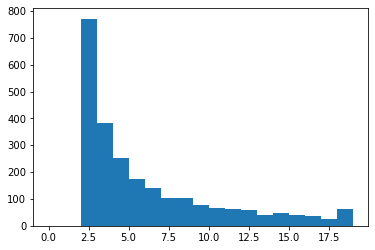

In [24]:
hapaxes_cat1 = wordfreqs_cat1.hapaxes()
plt.hist(wordfreqs_cat1.values(), bins = range(20))
plt.show()

In [25]:
hapaxes_cat1

[]

### Category 2

### Top 20 most common "Game of Thrones" term after more intense data cleansing  

In [26]:
wordfreqs_cat2 = nltk.FreqDist(data['gameofthrones']['all_words'])
print (wordfreqs_cat2.most_common(20))

[('spoiler', 577), ('season', 216), ('would', 207), ('show', 197), ('king', 195), ('like', 187), ('jon', 157), ('watch', 151), ('got', 149), ('throne', 144), ('end', 140), ('time', 135), ('one', 128), ('think', 125), ('game', 121), ('book', 116), ('charact', 113), ('know', 109), ('kill', 102), ('see', 101)]


### Hapaxes & distribution plot

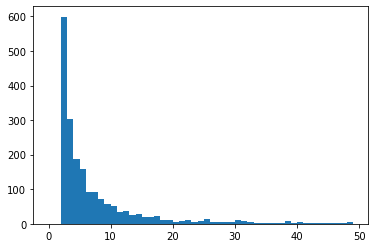

In [27]:
hapaxes_cat2 = wordfreqs_cat2.hapaxes()
plt.hist(wordfreqs_cat2.values(), bins = range(50))
plt.show()

In [28]:
hapaxes_cat2

[]

## Create labeled data

In [74]:
holdoutLength  = 100
#labeled data
labeled_data1 = [(word,'datascience') for word in data['datascience']['wordMatrix'][holdoutLength:]]
labeled_data2 = [(word,'gameofthrones') for word in data['gameofthrones']['wordMatrix'][holdoutLength:]]
labeled_data = []
labeled_data.extend(labeled_data1)
labeled_data.extend(labeled_data2)
#create holdout
holdout_data = data['datascience']['wordMatrix'][:holdoutLength]
holdout_data.extend(data['gameofthrones']['wordMatrix'][:holdoutLength])
holdout_data_labels = ([('datascience') for _ in range(holdoutLength)] + [('gameofthrones') for _ in range(holdoutLength)])
print(holdout_data_labels)

['datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascience', 'datascie

In [59]:
print (len(labeled_data))
print (len(holdout_data_labels))
print (labeled_data[20])

971
200
(['multi', 'user', 'collabor', 'notebook', 'hello', 'look', 'good', 'solut', 'collabor', 'work', 'notebook', 'far', 'tri', 'git', 'complic', 'colleagu', 'find', 'difficult', 'merg', 'json', 'file', 'jupyt', 'hub', 'misunderstood', 'document', 'user', 'access', 'notebook', 'server', 'one', 'notebook', 'tri', 'cocalc', 'week', 'end', 'tool', 'fit', 'need', 'thank', 'edit', 'cocalc', 'good', 'solut', 'compani', 'sit', 'top', 'best', 'solut', 'concurr', 'edit', 'tri', 'databrick', 'possibl', 'solut', 'good', 'solut', 'use', 'git', 'jupytext', 'convert', 'ipynb', 'rmd', 'file', 'push', 'rmd'], 'datascience')
200


In [32]:
data['datascience']['all_words_dedup'] = list(OrderedDict.fromkeys(data['datascience']['all_words']))
data['gameofthrones']['all_words_dedup'] = list(OrderedDict.fromkeys(data['gameofthrones']['all_words']))

In [33]:
all_words = []
all_words.extend(data['datascience']['all_words_dedup'])
all_words.extend(data['gameofthrones']['all_words_dedup'])

In [34]:
all_words_dedup = list(OrderedDict.fromkeys(all_words))

In [77]:
prepared_data = [({word: (word in x[0]) for word in all_words_dedup}, x[1]) for x in labeled_data]
prepared_holdout_data = [({word: (word in x[0]) for word in all_words_dedup}) for x in holdout_data]
print(holdout_data[1])

['amazon', 'machin', 'learn', 'univers', 'make', 'onlin', 'cours', 'avail', 'public']


In [75]:
print (prepared_holdout_data[1])

{'week': False, 'enter': False, 'transit': False, 'thread': False, '09': False, 'aug': False, '2020': False, '16': False, 'welcom': False, 'question': False, 'get': False, 'start': False, 'studi': False, 'data': False, 'scienc': False, 'field': False, 'topic': False, 'includ': False, 'learn': False, 'resourc': False, 'e': False, 'g': False, 'book': False, 'tutori': False, 'video': False, 'tradit': False, 'educ': False, 'school': False, 'degre': False, 'elect': False, 'altern': False, 'onlin': False, 'cours': False, 'bootcamp': False, 'job': False, 'search': False, 'resum': False, 'appli': False, 'career': False, 'prospect': False, 'elementari': False, 'next': False, 'wait': False, 'answer': False, 'communiti': False, 'check': False, 'faq': False, 'https': False, 'www': False, 'reddit': False, 'com': False, 'datasci': False, 'wiki': False, 'frequent': False, 'ask': False, 'page': False, 'also': False, 'past': False, 'q': False, '20thread': False, 'restrict_sr': False, 'sort': False, 'ne

In [50]:
random.shuffle(prepared_data)
train_size = int(len(prepared_data) * 0.82)
train = prepared_data[:train_size]
test = prepared_data[train_size:]

# Text Analytics

## Naive Bayes

In [51]:
nbr_got = 0
nbr_data = 0
for set in train:
    if set[1]=='datascience':
        nbr_data+=1
    if set[1]=='gameofthrones':
        nbr_got+=1
print (nbr_got)
print (nbr_data)

374
422


In [60]:
classifier  = nltk.NaiveBayesClassifier.train(train)

In [61]:
nltk.classify.accuracy(classifier, test)

0.96

In [62]:
print(classifier.show_most_informative_features(20))

Most Informative Features
                 spoiler = False          datasc : gameof =    149.8 : 1.0
                  season = True           gameof : datasc =     62.0 : 1.0
                 project = True           datasc : gameof =     54.7 : 1.0
                 compani = True           datasc : gameof =     48.2 : 1.0
                     job = True           datasc : gameof =     35.3 : 1.0
                    busi = True           datasc : gameof =     26.3 : 1.0
                   learn = True           datasc : gameof =     23.7 : 1.0
                  career = True           datasc : gameof =     23.3 : 1.0
                   appli = True           datasc : gameof =     21.6 : 1.0
                  machin = True           datasc : gameof =     19.3 : 1.0
                research = True           datasc : gameof =     18.0 : 1.0
                 practic = True           datasc : gameof =     16.3 : 1.0
                       g = True           datasc : gameof =     15.7 : 1.0

In [78]:
classified_data = classifier.classify_many(prepared_holdout_data)

In [64]:
from nltk.metrics import ConfusionMatrix

cm = ConfusionMatrix(holdout_data_labels, classified_data)
print (cm)

              |       g |
              |       a |
              |   d   m |
              |   a   e |
              |   t   o |
              |   a   f |
              |   s   t |
              |   c   h |
              |   i   r |
              |   e   o |
              |   n   n |
              |   c   e |
              |   e   s |
--------------+---------+
  datascience |  <.>100 |
gameofthrones |   .<100>|
--------------+---------+
(row = reference; col = test)



## Decision trees

In [79]:
classifier2 = nltk.DecisionTreeClassifier.train(train)

In [80]:
nltk.classify.accuracy(classifier2, test)

1.0

In [81]:
print(classifier2.pseudocode(depth=4))

if spoiler == False: return 'datascience'
if spoiler == True: return 'gameofthrones'



In [82]:
classified_data2 = classifier2.classify_many(prepared_holdout_data)

In [83]:
cm = nltk.ConfusionMatrix(holdout_data_labels, classified_data2)
print (cm)

              |       g |
              |       a |
              |   d   m |
              |   a   e |
              |   t   o |
              |   a   f |
              |   s   t |
              |   c   h |
              |   i   r |
              |   e   o |
              |   n   n |
              |   c   e |
              |   e   s |
--------------+---------+
  datascience |<100>  . |
gameofthrones |   .<100>|
--------------+---------+
(row = reference; col = test)

